# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [48]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [49]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image,gaussFilter , boundary='symm', mode='same')
filterResponseSobelX = signal.convolve2d(image,sobelX , boundary='symm', mode='same')
filterResponseSobelY = signal.convolve2d(image,sobelY , boundary='symm', mode='same')

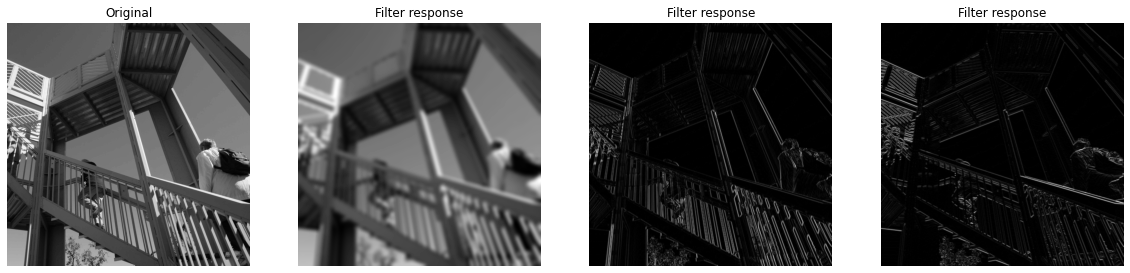

In [50]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Question 3: What is the size of the different filters?
          
Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?



In [51]:
# Question 1:
 # Guassian filters are used for blurring or smoothing the images
 # SobelX filters are used for detecting edges in the X plane
 # SobelY filters are used for detecting edges in the Y plane

# Question 2:
 # (512,512)
 # Image has three channels
 # Channels normaly comprises of Red, Green, Blue
    
# Question 3:
 # Gaussian Filter : (15,15)
 # SobelX Filter : (3,3)
 # SobelY Filter : (3,3)
    
# Question 4:
 # Size is also (512,512) same as input i.e size of input image
    
# Question 5:
 # Gaussian Filter : (498,498)
 # SobelX Filter : (510, 510)
 # SobelY Filter : (510, 510)
 # When mode 'valid' is used output consist of elements that don't rely on the zero padding, hence the size of the
 # valid filter is size of imput image minus size of the filter
    
# Question 6:
 # They make the images smaller has it goes through the CNN network

In [52]:
# Your code for checking sizes of image and filter responses
print ("The sizes of image is :" ,image.shape)
print ("The original filter size of GaussFilter is :" ,gaussFilter.shape)
print ("The original filter size of SobelXFilter is :" ,sobelX.shape)
print ("The original filter size of SobelYFilter is :" ,sobelY.shape)

#For mode='same'
print ("The Gaussian filter size for mode same equals :" ,filterResponseGauss.shape)
print ("The sobelX filter size for mode same equals :" ,filterResponseSobelX.shape)
print ("The sobelY filter size  for mode same equals :" ,filterResponseSobelY.shape)

# For mode='valid'
filterGaussValid =  signal.convolve2d(image,gaussFilter , boundary='symm', mode='valid')
filterSobelXValid = signal.convolve2d(image,sobelX , boundary='symm', mode='valid')
filterSobelYValid = signal.convolve2d(image,sobelY , boundary='symm', mode='valid')

print ("The Gaussian filter response size for mode='valid' is :" ,filterGaussValid.shape)
print ("The sobelX filter response size for mode='valid' is :" ,filterSobelXValid.shape)
print ("The sobelY filter response size for mode='valid' is :" ,filterSobelYValid.shape)



The sizes of image is : (512, 512)
The original filter size of GaussFilter is : (15, 15)
The original filter size of SobelXFilter is : (3, 3)
The original filter size of SobelYFilter is : (3, 3)
The Gaussian filter size for mode same equals : (512, 512)
The sobelX filter size for mode same equals : (512, 512)
The sobelY filter size  for mode same equals : (512, 512)
The Gaussian filter response size for mode='valid' is : (498, 498)
The sobelX filter response size for mode='valid' is : (510, 510)
The sobelY filter response size for mode='valid' is : (510, 510)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [47]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

IndexError: list index out of range

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.

In [ ]:
# Question 7:
 # A convolution layer receives the image w × h × c as input, here c represents the number of channels referred to as 
 # the depth of the CNN network

# Question 8:
 # Conv2D can process convolutional compution with multiple channels to the input, while the convolve2d can only process 
 # single channel.

# Question 9:
 #  Using GPU card is faster than CPU, but will require more time, i.e slower because we are feeding a batch of 1000 images
 # compared to using only 3 images for CPU.   
    


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [5]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

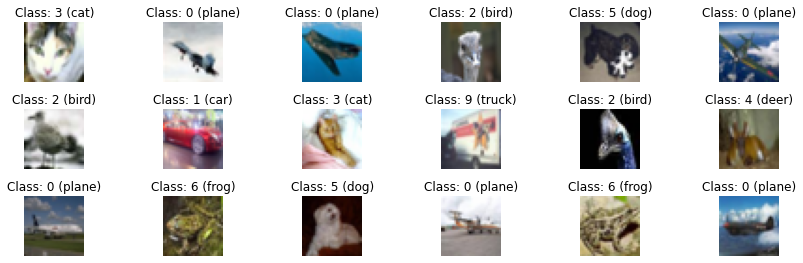

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
from sklearn.model_selection import train_test_split

Xtrain,Xval,Ytrain, Yval = train_test_split(Xtrain,Ytrain, test_size=0.25)

# Print the size of training data, validation data and test data
print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xval has size {}.'.format(Xval.shape))
print('Yval has size {}.'.format(Yval.shape))
print('Xtest has size {}.'.format(Xtest.shape))

Xtrain has size (7500, 32, 32, 3).
Ytrain has size (7500, 1).
Xval has size (2500, 32, 32, 3).
Yval has size (2500, 1).
Xtest has size (2000, 32, 32, 3).


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [8]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [9]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print (Xtrain.shape, Ytrain.shape)
print (Xval.shape, Yval.shape,Ytest.shape)

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain)
Yval = to_categorical(Yval)
Ytest = to_categorical(Ytest)

# Print shapes after converting the labels
print('\n''The shapes after converting''\n')
print('The shape of Ytrain: ',Ytrain.shape)
print('The shape of Yval: ',Yval.shape)
print('The shape of Ytest: ',Ytest.shape)

(7500, 32, 32, 3) (7500, 1)
(2500, 32, 32, 3) (2500, 1) (2000, 1)

The shapes after converting

The shape of Ytrain:  (7500, 10)
The shape of Yval:  (2500, 10)
The shape of Ytest:  (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [10]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(n_filters,kernel_size=(3,3),strides=(1, 1),padding = 'same',activation='relu',input_shape=input_shape[1:]))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add(Conv2D(n_filters*(2**(i+1)),kernel_size=(3,3),strides=(1, 1),padding = 'same',activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
       
        
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    if n_dense_layers > 0:
        for i in range(n_dense_layers):
            model.add(Dense(n_nodes, activation = "relu"))
            model.add(BatchNormalization())
            if use_dropout == True:
                model.add(Dropout(0.5))
       
    # Add final dense layer
    model.add(Dense(10, activation = "softmax"))
    
    # Compile model
    optim = Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',optimizer=optim,metrics=['accuracy'])
    
    return model

In [11]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [12]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape

# Build model
model1 = build_CNN(input_shape = input_shape, 
                   n_conv_layers=2, 
                   n_filters=16, 
                   n_dense_layers=0, 
                   n_nodes=50, 
                   use_dropout=False, 
                   learning_rate=0.01)


# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval))

C:\Users\sijia\.conda\envs\Tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
75/75 [==============================] - 6s 64ms/step - loss: 3.0633 - accuracy: 0.3157 - val_loss: 2.2319 - val_accuracy: 0.2784
Epoch 2/20
75/75 [==============================] - 3s 45ms/step - loss: 1.5780 - accuracy: 0.4711 - val_loss: 1.7993 - val_accuracy: 0.3456
Epoch 3/20
75/75 [==============================] - 4s 48ms/step - loss: 1.2589 - accuracy: 0.5556 - val_loss: 1.4905 - val_accuracy: 0.4552
Epoch 4/20
75/75 [==============================] - 3s 41ms/step - loss: 1.1158 - accuracy: 0.5971 - val_loss: 1.4045 - val_accuracy: 0.4988
Epoch 5/20
75/75 [==============================] - 3s 37ms/step - loss: 1.0091 - accuracy: 0.6452 - val_loss: 1.2967 - val_accuracy: 0.5484
Epoch 6/20
75/75 [==============================] - 3s 35ms/step - loss: 0.9216 - accuracy: 0.6724 - val_loss: 1.2920 - val_accuracy: 0.5656
Epoch 7/20
75/75 [==============================] - 3s 35ms/step - loss: 0.8380 - accuracy: 0.7060 - val_loss: 1.3149 - val_accuracy: 0.5612
Epoch 8/20
75

In [13]:
# Evaluate the trained model on test set, not used in training or validation
score =  model1.evaluate(Xtest, Ytest, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

score_1 = model1.evaluate(Xtrain,Ytrain,batch_size=100) 
print('Train accuracy: %.4f' % score_1[1])

63/63 [==============================] - 1s 4ms/step - loss: 2.8360 - accuracy: 0.5605
Test loss: 2.8360
Test accuracy: 0.5605
75/75 [==============================] - 1s 7ms/step - loss: 0.1843 - accuracy: 0.9359
Train accuracy: 0.9359


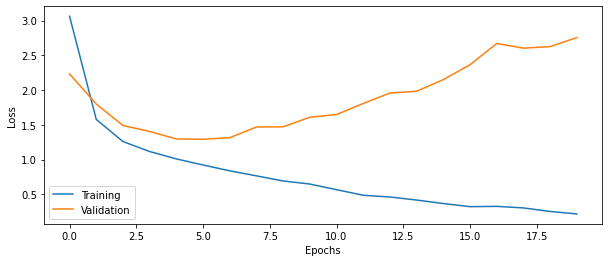

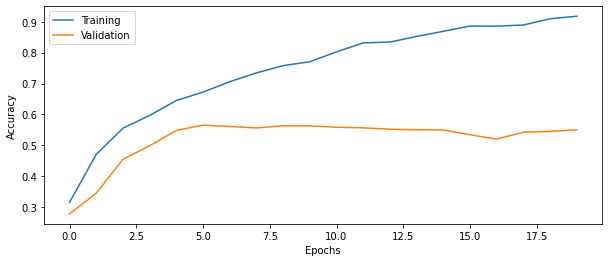

In [15]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 10: How big is the difference between training and test accuracy?

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

In [ ]:
# The test accuracy is 56.0 % . This is very low and can result in very high misclassification, hence model improvement is need
# Question 10
 # Test accuracy: 56.0% Train accuracy: 93.5%
# Question 11
 # The size of image is larger than the numerical data of the DNN lab1

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [16]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape

# Build model
model2 = build_CNN(input_shape, 
                   n_conv_layers=2, 
                   n_filters=16, 
                   n_dense_layers=1, 
                   n_nodes=50, 
                   use_dropout=False, 
                   learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval))

Epoch 1/20
75/75 [==============================] - 4s 33ms/step - loss: 1.6970 - accuracy: 0.3975 - val_loss: 1.9481 - val_accuracy: 0.2688
Epoch 2/20
75/75 [==============================] - 2s 22ms/step - loss: 1.3060 - accuracy: 0.5285 - val_loss: 2.1017 - val_accuracy: 0.2904
Epoch 3/20
75/75 [==============================] - 2s 22ms/step - loss: 1.0909 - accuracy: 0.6064 - val_loss: 2.4216 - val_accuracy: 0.2656
Epoch 4/20
75/75 [==============================] - 4s 60ms/step - loss: 0.9053 - accuracy: 0.6779 - val_loss: 1.5769 - val_accuracy: 0.4924
Epoch 5/20
75/75 [==============================] - 3s 41ms/step - loss: 0.7405 - accuracy: 0.7419 - val_loss: 1.4502 - val_accuracy: 0.5500
Epoch 6/20
75/75 [==============================] - 3s 43ms/step - loss: 0.6029 - accuracy: 0.7841 - val_loss: 1.6161 - val_accuracy: 0.5532
Epoch 7/20
75/75 [==============================] - 4s 47ms/step - loss: 0.4736 - accuracy: 0.8361 - val_loss: 1.6174 - val_accuracy: 0.5540
Epoch 8/20
75

In [17]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 4ms/step - loss: 2.8686 - accuracy: 0.5645
Test loss: 2.8686
Test accuracy: 0.5645


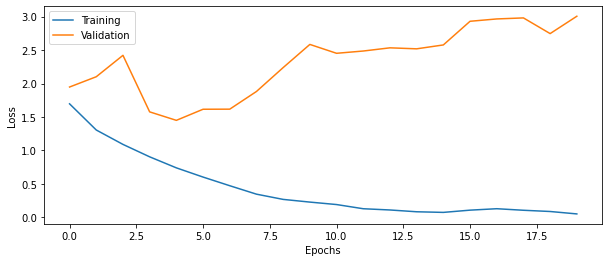

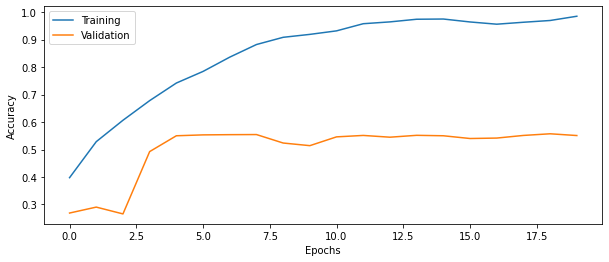

In [18]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [19]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape

# Build model
model3 = build_CNN(input_shape = input_shape, 
                   n_conv_layers=4, 
                   n_filters=16, 
                   n_dense_layers=1, 
                   n_nodes=50, 
                   use_dropout=False, 
                   learning_rate=0.01) 

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval))

Epoch 1/20
75/75 [==============================] - 4s 41ms/step - loss: 1.7169 - accuracy: 0.3879 - val_loss: 1.8966 - val_accuracy: 0.3632
Epoch 2/20
75/75 [==============================] - 7s 91ms/step - loss: 1.3703 - accuracy: 0.5007 - val_loss: 2.3577 - val_accuracy: 0.2704
Epoch 3/20
75/75 [==============================] - 5s 68ms/step - loss: 1.1787 - accuracy: 0.5797 - val_loss: 2.6358 - val_accuracy: 0.3344
Epoch 4/20
75/75 [==============================] - 5s 64ms/step - loss: 1.0393 - accuracy: 0.6247 - val_loss: 1.3963 - val_accuracy: 0.5168
Epoch 5/20
75/75 [==============================] - 4s 58ms/step - loss: 0.8761 - accuracy: 0.6871 - val_loss: 1.4675 - val_accuracy: 0.5536
Epoch 6/20
75/75 [==============================] - 3s 46ms/step - loss: 0.7102 - accuracy: 0.7485 - val_loss: 1.7118 - val_accuracy: 0.5240
Epoch 7/20
75/75 [==============================] - 2s 31ms/step - loss: 0.5931 - accuracy: 0.7897 - val_loss: 1.7543 - val_accuracy: 0.5568
Epoch 8/20
75

In [20]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 6ms/step - loss: 2.5174 - accuracy: 0.6015
Test loss: 2.5174
Test accuracy: 0.6015


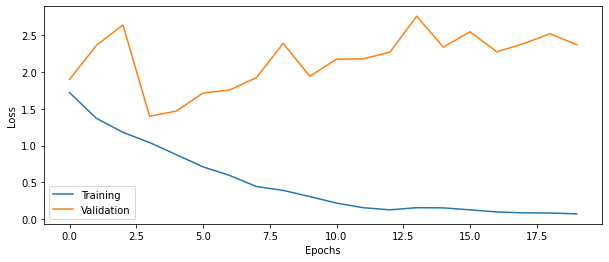

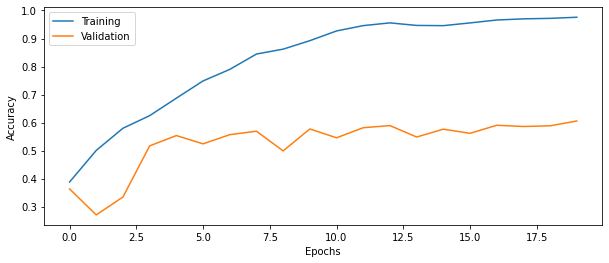

In [21]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 17: How does MaxPooling help in reducing the number of parameters to train?

In [ ]:
# Answer QST 12:
 # The number of trainable parameters is 124,180 while conv2d_87 (Conv2D) has most of the parameters with 73856
# Answer QST 13:
 # The input to the Cov2D layer is (32,32,16) images .The first layer has 16 filters with kernel_size=(3, 3). The output of Cov2D layer is image with 128 filters (None, 4, 4, 128).
# Answer QST 14:
 # Batch size is always the first dimension of each 4D tensor
# Answer QST 15:
 # 128 channels
# Answer QST 16:
 # There are different data in each channel
# Answer QST 17:
 # Max pooling picks only part of the pixels there by reducing computation cost because the number of parameters to train is reduced

In [22]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


In [ ]:
# Answer QST 18:
 # With dropout (50%) , we are getting 60.2 % test accuracy while without dropout we got 57.6% so model test accuracy increased by 4%
    
# Answer QST 19:
 # L2 and L1 regularization
 # Data augmentation
 # Adding regularization to dense layer with parameter lambda where lambda is the regularizing parameter

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [23]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape

# Build model
model4 = build_CNN(input_shape = input_shape, 
                   n_conv_layers=4, 
                   n_filters=16, 
                   n_dense_layers=1, 
                   n_nodes=50, 
                   use_dropout=True, 
                   learning_rate=0.01)  

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval))

Epoch 1/20
75/75 [==============================] - 4s 37ms/step - loss: 1.9884 - accuracy: 0.3073 - val_loss: 1.8340 - val_accuracy: 0.3484
Epoch 2/20
75/75 [==============================] - 4s 56ms/step - loss: 1.5440 - accuracy: 0.4281 - val_loss: 1.7397 - val_accuracy: 0.3512
Epoch 3/20
75/75 [==============================] - 6s 79ms/step - loss: 1.3970 - accuracy: 0.4872 - val_loss: 1.4106 - val_accuracy: 0.4948
Epoch 4/20
75/75 [==============================] - 5s 63ms/step - loss: 1.2550 - accuracy: 0.5460 - val_loss: 1.3805 - val_accuracy: 0.5144
Epoch 5/20
75/75 [==============================] - 5s 64ms/step - loss: 1.1520 - accuracy: 0.5841 - val_loss: 1.4546 - val_accuracy: 0.4936
Epoch 6/20
75/75 [==============================] - 4s 59ms/step - loss: 1.0552 - accuracy: 0.6299 - val_loss: 1.3050 - val_accuracy: 0.5660
Epoch 7/20
75/75 [==============================] - 3s 33ms/step - loss: 0.9323 - accuracy: 0.6729 - val_loss: 1.5449 - val_accuracy: 0.5492
Epoch 8/20
75

In [24]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 6ms/step - loss: 2.1184 - accuracy: 0.6015
Test loss: 2.1184
Test accuracy: 0.6015


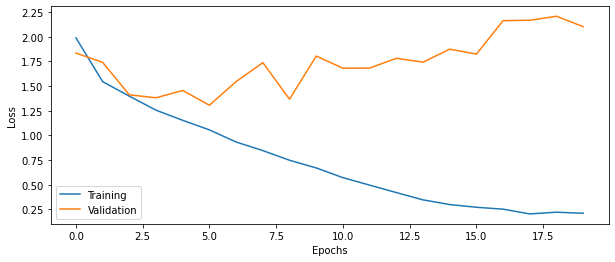

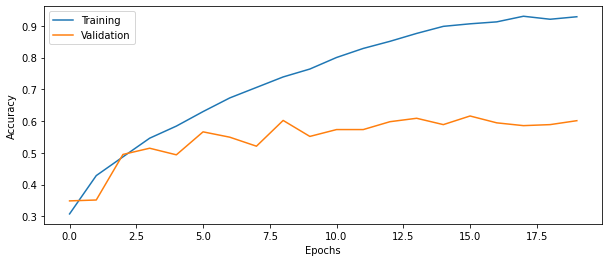

In [25]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

In [ ]:
# Answer QST 20:
 # Test accuracy of 62.4% was observed, best configuration is 
    # Batch_size : 100
    # N_conv_layers : 4
    # N_dense_layers : 1
    # N_nodes : 100
    # Dropout : 50%

## Your best config

In [29]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape

# Build model
model5 = build_CNN(input_shape = input_shape, 
                   n_conv_layers=4, 
                   n_filters=25, 
                   n_dense_layers=1, 
                   n_nodes=100, 
                   use_dropout=True) 
                   
# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,
                      Ytrain,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(Xval,Yval)) 

Epoch 1/20
75/75 [==============================] - 13s 164ms/step - loss: 1.9882 - accuracy: 0.3121 - val_loss: 2.4507 - val_accuracy: 0.2460
Epoch 2/20
75/75 [==============================] - 18s 239ms/step - loss: 1.5179 - accuracy: 0.4421 - val_loss: 2.1862 - val_accuracy: 0.2652
Epoch 3/20
75/75 [==============================] - 18s 238ms/step - loss: 1.3719 - accuracy: 0.5040 - val_loss: 1.6665 - val_accuracy: 0.4096
Epoch 4/20
75/75 [==============================] - 18s 246ms/step - loss: 1.2444 - accuracy: 0.5432 - val_loss: 1.3228 - val_accuracy: 0.5252
Epoch 5/20
75/75 [==============================] - 19s 251ms/step - loss: 1.1215 - accuracy: 0.5979 - val_loss: 1.3594 - val_accuracy: 0.5240
Epoch 6/20
75/75 [==============================] - 19s 257ms/step - loss: 0.9800 - accuracy: 0.6552 - val_loss: 1.9980 - val_accuracy: 0.4908
Epoch 7/20
75/75 [==============================] - 14s 189ms/step - loss: 0.8576 - accuracy: 0.6924 - val_loss: 1.3552 - val_accuracy: 0.5792

In [30]:
# Evaluate the trained model on test set, not used in training or validation
score = score = model5.evaluate(Xtest, Ytest, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 12ms/step - loss: 2.1384 - accuracy: 0.6160
Test loss: 2.1384
Test accuracy: 0.6160


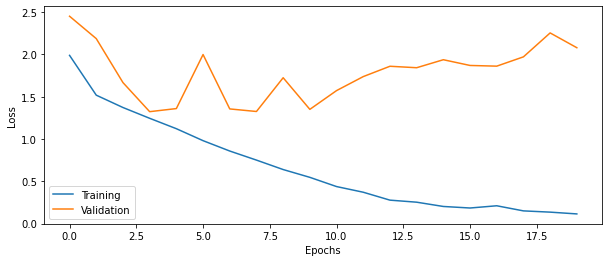

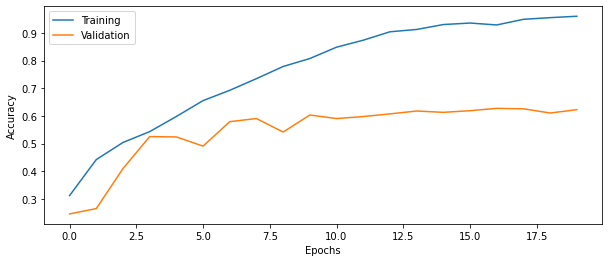

In [31]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

In [ ]:
# Answer QST 21:
 # Test accuracy for rotated test images is 23.6% and test accuracy without rotation is 60%, this is because CNN network has been trainned
 # to identify images while it is not rotated   

In [32]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

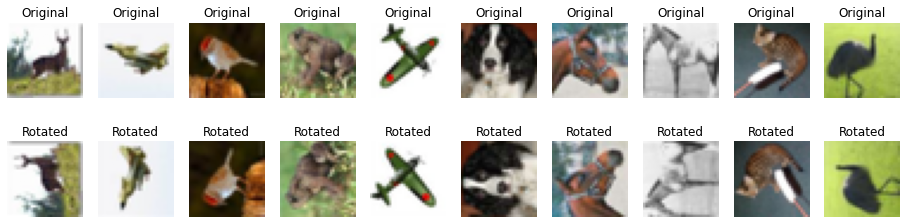

In [34]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [35]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated ,Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 4s 58ms/step - loss: 5.9725 - accuracy: 0.2360
Test loss: 5.9725
Test accuracy: 0.2360


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

In [36]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [37]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
dataGen = ImageDataGenerator(validation_split=0.2,rotation_range=30,vertical_flip=True,horizontal_flip=True,)


# Setup a flow for training data, assume that we can fit all images into CPU memory
train_flow=dataGen.flow(Xtrain,Ytrain, subset='training',batch_size=50)


# Setup a flow for validation data, assume that we can fit all images into CPU memory
validation_flow=dataGen.flow(Xtrain,Ytrain,subset='validation',batch_size=50)

## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

In [ ]:
# Answer QST 22:
 # We can load the images from Hard drive, however this will affect perfomance in speed, it will be slow

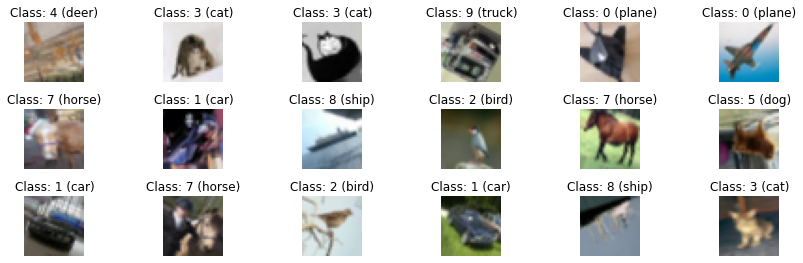

In [38]:
# Plot some augmented images
plot_dataGen = dataGen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_dataGen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Question 24: What other types of image augmentation can be applied, compared to what we use here?

In [ ]:
# Answer QST 23:
 # The test accuracy on rotated images without augmentation is around 25.5%(model.5) whereas with augmentation test accuracy increased to 32%(model.6)

# Answer QST 24:
 # i color augementation
 # ii 

In [39]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape

# Build model (your best config)
model6 = build_CNN(input_shape = input_shape, 
                   n_conv_layers=4, 
                   n_filters=25, 
                   n_dense_layers=1, 
                   n_nodes=100, 
                   use_dropout=True, 
                   learning_rate=0.01)

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = model6.fit_generator(train_flow,
                    steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size,
                    epochs=200,
                    validation_data=validation_flow,
                    validation_steps = len(Xtrain)*validation_split/batch_size) 

C:\Users\sijia\.conda\envs\Tensorflow\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
80/80 [==============================] - 18s 210ms/step - loss: 2.3243 - accuracy: 0.2260 - val_loss: 2.2092 - val_accuracy: 0.2300
Epoch 2/200
80/80 [==============================] - 15s 182ms/step - loss: 1.9137 - accuracy: 0.2975 - val_loss: 2.3072 - val_accuracy: 0.2170
Epoch 3/200
80/80 [==============================] - 14s 178ms/step - loss: 1.8265 - accuracy: 0.3170 - val_loss: 1.9126 - val_accuracy: 0.3100
Epoch 4/200
80/80 [==============================] - 15s 185ms/step - loss: 1.7574 - accuracy: 0.3512 - val_loss: 1.7981 - val_accuracy: 0.3370
Epoch 5/200
80/80 [==============================] - 13s 164ms/step - loss: 1.6809 - accuracy: 0.3798 - val_loss: 1.6742 - val_accuracy: 0.3770
Epoch 6/200
80/80 [==============================] - 14s 179ms/step - loss: 1.6418 - accuracy: 0.3873 - val_loss: 1.6027 - val_accuracy: 0.3990
Epoch 7/200
80/80 [==============================] - 16s 193ms/step - loss: 1.6226 - accuracy: 0.4080 - val_loss: 1.7796 - val_accuracy:

80/80 [==============================] - 14s 176ms/step - loss: 0.7086 - accuracy: 0.7525 - val_loss: 1.1309 - val_accuracy: 0.6270
Epoch 114/200
80/80 [==============================] - 9s 117ms/step - loss: 0.7222 - accuracy: 0.7520 - val_loss: 1.1706 - val_accuracy: 0.6380
Epoch 115/200
80/80 [==============================] - 14s 174ms/step - loss: 0.6971 - accuracy: 0.7670 - val_loss: 1.0794 - val_accuracy: 0.6480
Epoch 116/200
80/80 [==============================] - 10s 122ms/step - loss: 0.6982 - accuracy: 0.7582 - val_loss: 1.1760 - val_accuracy: 0.6340
Epoch 117/200
80/80 [==============================] - 14s 172ms/step - loss: 0.6785 - accuracy: 0.7600 - val_loss: 1.1211 - val_accuracy: 0.6400
Epoch 118/200
80/80 [==============================] - 10s 124ms/step - loss: 0.6557 - accuracy: 0.7793 - val_loss: 1.1418 - val_accuracy: 0.6420
Epoch 119/200
80/80 [==============================] - 15s 183ms/step - loss: 0.8900 - accuracy: 0.7082 - val_loss: 2.1709 - val_accuracy: 

In [40]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.0972
Test accuracy: 0.6765
Test loss: 2.9594
Test accuracy: 0.3275


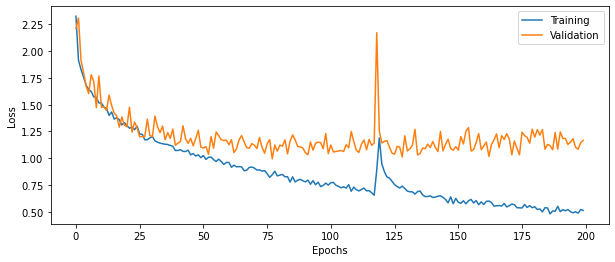

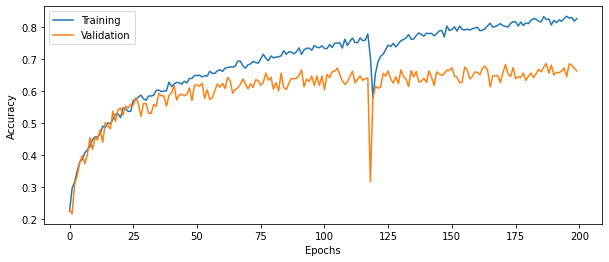

In [41]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [42]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

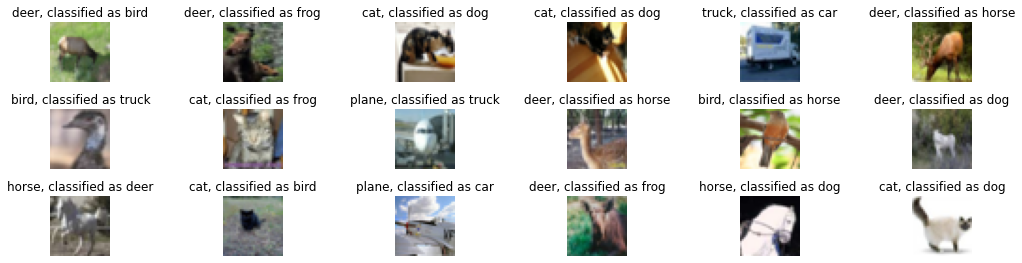

In [40]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

In [ ]:
# Answer QST 25:
 # No, it cannot classify the images with different size as the CNN network is trainied with (32 x 32)
# Answer QST 26:
 # Use SPP-Net to remove the fixed constraint on the network

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 

Question 28: How many trainable parameters does the ResNet50 network have? 

Question 29: What is the size of the images that ResNet50 expects as input?

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [ ]:
# Answer QST 27:
 # 5 convolutional layers
# Answer QST 28:
 # 25,583,592
# Answer QST 29:
 # (224, 224, 3)
# Answer QST 30:
 # Second derivative is used to undersatnd the rate of change of derivatives because matrix of size 25,583,592 * 25,583,592
 # will be time consuming and expensive   

In [46]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img_path1 = "C:\\Users\\sijia\\OneDrive\\Documents\\LIU\\Deep Learning\\Zebra.jpg"
img_path2 = "C:\\Users\\sijia\\OneDrive\\Documents\\LIU\\Deep Learning\\Elephant.jpg"
img_path3 = "C:\\Users\\sijia\\OneDrive\\Documents\\LIU\\Deep Learning\\Monkey.jpg"
img_path4 = "C:\\Users\\sijia\\OneDrive\\Documents\\LIU\Deep Learning\\Panda.jpg"
img_path5 = "C:\\Users\\sijia\\OneDrive\\Documents\\LIU\Deep Learning\\Tiger.jpg"

target = ['Zebra','Elephant','Monkey','Panda','Tiger']

img_list=[img_path1,img_path2,img_path3,img_path4,img_path5]
for img_path in img_list:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    # predicting top 3 predictions 
    print('Predicted:', decode_predictions(preds, top=1)[0])
    print("The target:",target)

Predicted: [('n02391049', 'zebra', 0.9853624)]
The target: ['Zebra', 'Elephant', 'Monkey', 'Panda', 'Tiger']
Predicted: [('n02504013', 'Indian_elephant', 0.83921385)]
The target: ['Zebra', 'Elephant', 'Monkey', 'Panda', 'Tiger']
Predicted: [('n02481823', 'chimpanzee', 0.9749221)]
The target: ['Zebra', 'Elephant', 'Monkey', 'Panda', 'Tiger']
Predicted: [('n02510455', 'giant_panda', 0.8173571)]
The target: ['Zebra', 'Elephant', 'Monkey', 'Panda', 'Tiger']
Predicted: [('n02129604', 'tiger', 0.86346215)]
The target: ['Zebra', 'Elephant', 'Monkey', 'Panda', 'Tiger']


In [45]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________